## Import libraries

In [3]:
import numpy as np
import pandas as pd

## Prepare the data

In [4]:
train_data = pd.read_csv("../Data/train.csv", sep=";")
test_data = pd.read_csv("../Data/test.csv", sep=";")

In [5]:
train_data.head()

,SENTENCE,EMOTION
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
X_train = train_data["SENTENCE"]
y_train = train_data["EMOTION"]
X_test = test_data["SENTENCE"]
y_test = test_data["EMOTION"]

## Encode the data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder = LabelEncoder()

In [9]:
y_train_labeled = label_encoder.fit_transform(y_train)
y_test_labeled = label_encoder.fit_transform(y_test)

## Cleaning the data

In [10]:
from nltk.corpus import stopwords
import nltk # Natural Language Tool Kit
from bs4 import BeautifulSoup
import re

In [11]:
nltk.download("stopwords")
new_list = stopwords.words("english") # Download stopwords in English

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words = set(stopwords.words("english"))

In [13]:
def clean_sentence(sentence):
    if sentence != "":
        sentence = BeautifulSoup(sentence, "lxml").get_text()
        sentence = re.sub("[^a-zA-Z]", " ", sentence)
        sentence = sentence.lower()
        words_list = sentence.split()
        words_list_cleaned = [word for word in words_list if word not in stop_words]
        return (" ".join(words_list_cleaned))

## Clear all data

In [14]:
X_train_all = []
X_test_all = []

for i in range(len(X_train)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_train_all.append(clean_sentence(X_train[i]))

for i in range(len(X_test)):
    if (i + 1) % 1000 == 0:
        print(f"{i} sentence cleaned and loaded.")
    
    X_test_all.append(clean_sentence(X_test[i]))

999 sentence cleaned and loaded.
1999 sentence cleaned and loaded.
2999 sentence cleaned and loaded.
3999 sentence cleaned and loaded.
4999 sentence cleaned and loaded.
5999 sentence cleaned and loaded.
6999 sentence cleaned and loaded.
7999 sentence cleaned and loaded.
8999 sentence cleaned and loaded.
9999 sentence cleaned and loaded.
10999 sentence cleaned and loaded.
11999 sentence cleaned and loaded.
12999 sentence cleaned and loaded.
13999 sentence cleaned and loaded.
14999 sentence cleaned and loaded.
15999 sentence cleaned and loaded.
999 sentence cleaned and loaded.
1999 sentence cleaned and loaded.


## Tokenize the words

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(max_features=2000)

In [17]:
X_train_all_vectorized = vectorizer.fit_transform(X_train_all)
X_test_all_vectorized = vectorizer.transform(X_test_all)

X_train_all_vectorized = X_train_all_vectorized.toarray()
X_test_all_vectorized = X_test_all_vectorized.toarray()

X_test_all_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Get and train the models

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic_regression_model = LogisticRegression(solver="lbfgs", max_iter=3000)
logistic_regression_model.fit(X_train_all_vectorized, y_train_labeled)

LogisticRegression(max_iter=3000)

In [20]:
y_preds_log = logistic_regression_model.predict(X_test_all_vectorized)
y_preds_log

array([4, 4, 4, ..., 2, 2, 1])

### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_all_vectorized, y_train_labeled)

DecisionTreeClassifier()

In [23]:
y_preds_dtc = decision_tree_classifier.predict(X_test_all_vectorized)
y_preds_dtc

array([4, 4, 4, ..., 2, 2, 1])

### Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_all_vectorized, y_train_labeled)

RandomForestClassifier()

In [26]:
y_preds_rf = random_forest_classifier.predict(X_test_all_vectorized)
y_preds_rf

array([4, 4, 4, ..., 2, 2, 1])

### Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train_all_vectorized, y_train_labeled)

GaussianNB()

In [29]:
y_preds_gnb = gaussianNB.predict(X_test_all_vectorized)
y_preds_gnb

array([3, 3, 1, ..., 1, 1, 3])

### Bernoulli Naive Bayes

In [30]:
from sklearn.naive_bayes import BernoulliNB

In [31]:
bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train_all_vectorized, y_train_labeled)

BernoulliNB()

In [32]:
y_preds_bnb = bernoulliNB.predict(X_test_all_vectorized)
y_preds_bnb

array([4, 4, 4, ..., 2, 2, 1])

### K-nearest Neighbors (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_all_vectorized, y_train_labeled)

KNeighborsClassifier(n_neighbors=6)

In [35]:
y_preds_knn = knn.predict(X_test_all_vectorized)
y_preds_knn

array([4, 4, 4, ..., 2, 2, 4])

## Compare the models' accuracy

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
acc_log = accuracy_score(y_test_labeled, y_preds_log)
acc_log_percent = acc_log * 100
print(f"Logistic regression model's accuracy is % {acc_log_percent:.2f}")

Logistic regression model's accuracy is % 88.80


In [38]:
acc_gnb = accuracy_score(y_test_labeled, y_preds_gnb)
acc_gnb_percent = acc_gnb * 100
print(f"Gaussian naive bayes model's accuracy is % {acc_gnb_percent:.2f}")

Gaussian naive bayes model's accuracy is % 39.45


In [39]:
acc_bnb = accuracy_score(y_test_labeled, y_preds_bnb)
acc_bnb_percent = acc_bnb * 100
print(f"Bernoulli naive bayes model's accuracy is % {acc_bnb_percent:.2f}")

Bernoulli naive bayes model's accuracy is % 84.85


In [40]:
acc_dtc = accuracy_score(y_test_labeled, y_preds_dtc)
acc_dtc_percent = acc_dtc * 100
print(f"Decision tree classifier model's accuracy is % {acc_dtc_percent:.2f}")

Decision tree classifier model's accuracy is % 82.75


In [41]:
acc_rf = accuracy_score(y_test_labeled, y_preds_rf)
acc_rf_percent = acc_rf * 100
print(f"Random forest model's accuracy is % {acc_rf_percent:.2f}")

Random forest model's accuracy is % 87.15


In [42]:
acc_knn = accuracy_score(y_test_labeled, y_preds_knn)
acc_knn_percent = acc_knn * 100
print(f"K-nearest neighbors model's accuracy is % {acc_knn_percent:.2f}")

K-nearest neighbors model's accuracy is % 58.65


## Visualize the confusion matrix

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
cm_log = confusion_matrix(y_test_labeled, y_preds_log)
cm_log

array([[241,  10,   7,   1,  16,   0],
       [  7, 193,   4,   1,  14,   5],
       [  4,   4, 642,  33,   7,   5],
       [  2,   0,  31, 122,   3,   1],
       [ 16,   7,  18,   4, 535,   1],
       [  0,  13,   9,   0,   1,  43]])

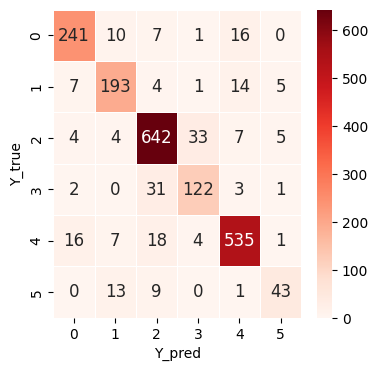

In [45]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_log, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.show()

## Best model to choose is Logistic Regression model with the accuracy % 88.8

## Give Manual Data

In [46]:
sentences = ["It is the best thing I have ever seen.", "I did not want to make everything bad", "Thank you so much for everything", "I am ever feeling nostalgic about the fireplace I will know that it is still on the property"]
sentences_cleaned = []

for sentence in sentences:
    sentences_cleaned.append(clean_sentence(sentence))

sentences_cleaned

['best thing ever seen',
 'want make everything bad',
 'thank much everything',
 'ever feeling nostalgic fireplace know still property']

In [47]:
sentences_cleaned_vectorized = vectorizer.transform(sentences_cleaned)
sentences_cleaned_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 16 stored elements and shape (4, 2000)>

In [48]:
y_pred_manual = logistic_regression_model.predict(sentences_cleaned_vectorized)
y_pred_manual

array([2, 4, 2, 3])

In [49]:
y_train[:10], y_train_labeled[:10]

(0     sadness
 1     sadness
 2       anger
 3        love
 4       anger
 5     sadness
 6    surprise
 7        fear
 8         joy
 9        love
 Name: EMOTION, dtype: object,
 array([4, 4, 0, 3, 0, 4, 5, 1, 2, 3]))

In [50]:
emotion_dict = {0: "Anger", 1: "Fear", 2: "Joy", 3: "Love", 4: "Sadness", 5: "Surprise"}

for idx, sentence in enumerate(sentences):
    print(f"The sentence '{sentence}' expresses '{emotion_dict[y_pred_manual[idx]]}'.")

The sentence 'It is the best thing I have ever seen.' expresses 'Joy'.
The sentence 'I did not want to make everything bad' expresses 'Sadness'.
The sentence 'Thank you so much for everything' expresses 'Joy'.
The sentence 'I am ever feeling nostalgic about the fireplace I will know that it is still on the property' expresses 'Love'.
